# Comfirm DataSet 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1510132191100554661
xla_global_id: -1
]


In [ ]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#출처: https://hdevstudy.tistory.com/116 [김인연의 개발 공부:티스토리]

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


train data 50000개 크기 32 x 32 이고 뒤에 3 -> RGB를 의미

test data 10000개 크기 32 x 32 RGB

[6], [9], [9], [4], [1], 

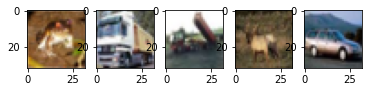

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    print(train_labels[i], end=", ")
plt.show()

In [ ]:
print(np.unique(train_labels)) # label 은 0~9
print(np.unique(train_labels, return_counts = True)) #각각 5000개씩 data가 들어있다

#출처: https://rfriend.tistory.com/621 [R, Python 분석과 프로그래밍의 친구 (by R Friend):티스토리]

[0 1 2 3 4 5 6 7 8 9]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


# Normalization (0 ~ 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
#from keras.utils import to_categorical  -> 오류남

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

#[6] -> [0,0,0,0,0,0,1,0,0,0]

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], 

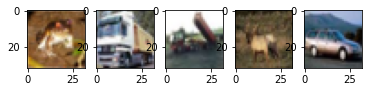

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    print(train_labels[i], end=", ")
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

batch_size = 100
img_height = 32
img_width = 32

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
#model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu'))
#model.add(tf.keras.layers.MaxPool2D(pool_size=2))
#model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, padding='same', strides=1, activation='relu'))
#model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 10)                40970     
                                                                 
Total params: 41,754
Trainable params: 41,754
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, batch_size=10, epochs=10, validation_split=0.8)

Epoch 1/10
1000/1000 [==============================] - 25s 24ms/step - loss: 1.7678 - accuracy: 0.3709 - val_loss: 1.6260 - val_accuracy: 0.4152
Epoch 2/10
1000/1000 [==============================] - 30s 30ms/step - loss: 1.4054 - accuracy: 0.5098 - val_loss: 1.5084 - val_accuracy: 0.4688
Epoch 3/10
1000/1000 [==============================] - 23s 23ms/step - loss: 1.2694 - accuracy: 0.5551 - val_loss: 1.4555 - val_accuracy: 0.4979
Epoch 4/10
1000/1000 [==============================] - 24s 24ms/step - loss: 1.1749 - accuracy: 0.5860 - val_loss: 1.3879 - val_accuracy: 0.5229
Epoch 5/10
1000/1000 [==============================] - 23s 23ms/step - loss: 1.0970 - accuracy: 0.6187 - val_loss: 1.4581 - val_accuracy: 0.4972
Epoch 6/10
1000/1000 [==============================] - 23s 23ms/step - loss: 1.0251 - accuracy: 0.6457 - val_loss: 1.3360 - val_accuracy: 0.5461
Epoch 7/10
1000/1000 [==============================] - 23s 23ms/step - loss: 0.9579 - accuracy: 0.6647 - val_loss: 1.3792 -

메모리가 터지는 문제 발생


최대한 메모리를 낮춰보자